create by ridwan_puadi

# 1 Pendahuluan

## 1.1 Decision Trees

Decision Trees (Pohon Keputusan) merupakan metode klasiﬁkasi yang populer dan mudah
diinterpretasi. Mereka membangun struktur pohon yang berdasarkan pada ﬁtur dan
kondisi yang dipilih untuk memecah dataset menjadi kelas yang berbeda.

## 1.2 Random Forest

Random Forest adalah metode klasiﬁkasi yang menggabungkan kekuatan beberapa
Decision Trees untuk menghasilkan prediksi yang lebih baik. Dalam proses ini, algoritma mengurangi varians dan overﬁtting yang mungkin terjadi pada Decision Trees tunggal.

# 2 Algoritma

## 2.1 Algoritma Decision Trees

Algoritma pohon keputusan bekerja dengan memilih ﬁtur terbaik untuk memecah data dan
mengulanginya secara rekursif hingga mencapai kondisi berhenti, seperti kedalaman
maksimum pohon atau jumlah minimum sampel yang diperlukan untuk memecah simpul.

## 2.2 Algoritma Random Forest

Random Forest bekerja dengan membuat sejumlah Decision Trees dan menggabungkan
hasil prediksi mereka melalui metode voting. Setiap pohon dibangun dengan menggunakan bagian acak dari data latih dan ﬁtur, proses ini dikenal sebagai 'bagging' dan 'feature randomness'.

# 3 Matematika di Belakang Decision Trees dan Random Forest


## 3.1 Decision Trees

Metode umum untuk memilih ﬁtur terbaik adalah dengan mengukur impurity dari simpul menggunakan metrik seperti Gini impurity atau Entropy. Impurity yang lebih rendah mengindikasikan simpul yang lebih "murni" atau lebih baik dalam mengklasiﬁkasikan data.

## 3.2 Random Forest

Random Forest tidak memiliki matematika yang spesiﬁk di luar Decision Trees, karena prinsip dasarnya adalah menggabungkan kekuatan beberapa pohon keputusan.

# 4 Kasus yang Direkomendasikan

## 4.1 Decision Trees

Decision Trees sangat cocok untuk:
1. Klasiﬁkasi data yang memiliki ﬁtur kategorikal atau numerik
2. Masalah yang memerlukan interpretasi yang mudah dan bisa dijelaskan
3. Ketika overﬁtting bisa dikendalikan dengan membatasi kedalaman pohon atau prunning

## 4.2 Random Forest
Random Forest cocok untuk:
1. Klasiﬁkasi data yang memiliki ﬁtur kategorikal atau numerik
2. Masalah yang memerlukan ketahanan terhadap overﬁtting
3. Ketika kinerja yang lebih baik daripada Decision Trees tunggal diinginkan

# 5 Contoh Kasus (Car Evaluation)

## 5.1 Memuat data dan import packages

Dataset yang digunakan pembuatan model klasifikasi menggunakan algoritma decision tree adalah car_evaluation.csv yang sudah di edit, sumber asli: https://archive.ics.uci.edu/dataset/19/car+evaluation.

Tujuan dari pembuatan model ini adalah untuk mengklasifikasikan mobil berdasarkahn beberapa kriteria seperti harga, jumlah pintu, kapasitas penumpang, jenis bodi mobil. dengan menggunakan algoritma decision tree, dapat membangun model yang memprediksi kelas mobil yaitu 'unacc' dan 'acc'.

Model ini dapat berguna dalam industri otomotif untuk memudahkan proses pengambilan keputusan dan memilih mobil yang paling sesuai dengan kebutuhan dan budget pelanggan.

Berikut penjelasan mengenai fitur-fitur yang terdapat dalam dataset:
* *buying*: fitur ini mengindikasikan harga pembelian mobil.
* *maint*: fitur ini mengindikasikan perawatan mobil.
* *doors*: fitur ini mengindikasikan jumlah pintu pada mobil.
* *persons*: fitur ini mengindikasikan jumlah pintu pada mobil, yaitu berapa banyak penumpang yang dapat diangkut.
* *lug_boot*: fitur ini mengindikasikan kapasitas bagasi mobil.
* *safety*: fitur ini mengindikasikan tingkat keamanan mobil.
* *class*: digunakan untuk memprediksi kelas mobil yang terdiri dari 'unacc' (tidak dapat diterima) dan 'acc' (diterima).

In [1]:
# Import library yang diperlukan
import numpy as np  # memudahkan perhitungan tipe data numerik
import pandas as pd  # manipulasi data, data analisis
import matplotlib.pyplot as plt  # membuat chart dan grafik
import seaborn as sns  # menampilkan visualisasi data
import warnings  # menonaktifkan peringatan
warnings.filterwarnings("ignore")

In [3]:
# Memuat dataset
df = pd.read_csv('car_evaluation')

In [ ]:
# Menampilkan 5 baris pertama
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## 5.2 Menyelidiki Data

Setelah memuat data, langkah selanjutnya adalah menyelidikinya untuk memahami karakteristik dan struktur data. Kita akan menggunakan berbagai fungsi dari pustaka
pandas untuk melakukan tugas ini.

In [4]:
# Menampilkan 5 baris pertama data
print ('sample data')
display(df.head())

sample data


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
# Menampilkan informasi dataset
print ('\ninformasi kolom')
display(df.info())


informasi kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1593 non-null   object
 1   maint     1593 non-null   object
 2   doors     1593 non-null   object
 3   persons   1593 non-null   object
 4   lug_boot  1593 non-null   object
 5   safety    1593 non-null   object
 6   class     1593 non-null   object
dtypes: object(7)
memory usage: 87.2+ KB


None

  * informasi diatas menunjukan dataset yang digunakan memiliki 1593 tuple/baris dan 7 fitur/kolom.
  * tipe data semua fitur adalah string/object
  * tidak terdapat jumlah data null
  * serta jumlah memori yang digunakan

In [6]:
# Menampilkan statistik deskripif data
print('\n statistika deskriptif')
display(df.describe())


 statistika deskriptif


,buying,maint,doors,persons,lug_boot,safety,class
count,1593,1593,1593,1593,1593,1593,1593
unique,4,4,4,3,3,3,2
top,high,vhigh,2,2,small,low,unacc
freq,432,431,406,575,554,575,1209


In [9]:
# Mengecek apakah ada nilai yang hilang
print('\n mengecek missing value')
display(df.isnull().sum())


 mengecek missing value


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

tidak ada nilai yang hilang

In [11]:
# Menampilkan jumlah kemunculan setiap nilai pada setiap kolom
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(df[col].value_counts())

high     432
vhigh    431
med      383
low      347
Name: buying, dtype: int64
vhigh    431
high     419
med      383
low      360
Name: maint, dtype: int64
2        406
3        399
4        394
5more    394
Name: doors, dtype: int64
2       575
4       510
more    508
Name: persons, dtype: int64
small    554
med      527
big      512
Name: lug_boot, dtype: int64
low     575
med     537
high    481
Name: safety, dtype: int64
unacc    1209
acc       384
Name: class, dtype: int64


Informasi diatas menampilkan kemunculan setiap nilai pada setiap fitur

## 5.3 Visualisasi Data

Visualisasi adalah cara yang efektif untuk memahami data dan mengidentiﬁkasi tren atau pola yang mungkin ada. Kita akan menggunakan pustaka Matplotlib untuk membuat plot yang membantu kita memahami hubungan antara ﬁtur dan target dalam dataset sintetis

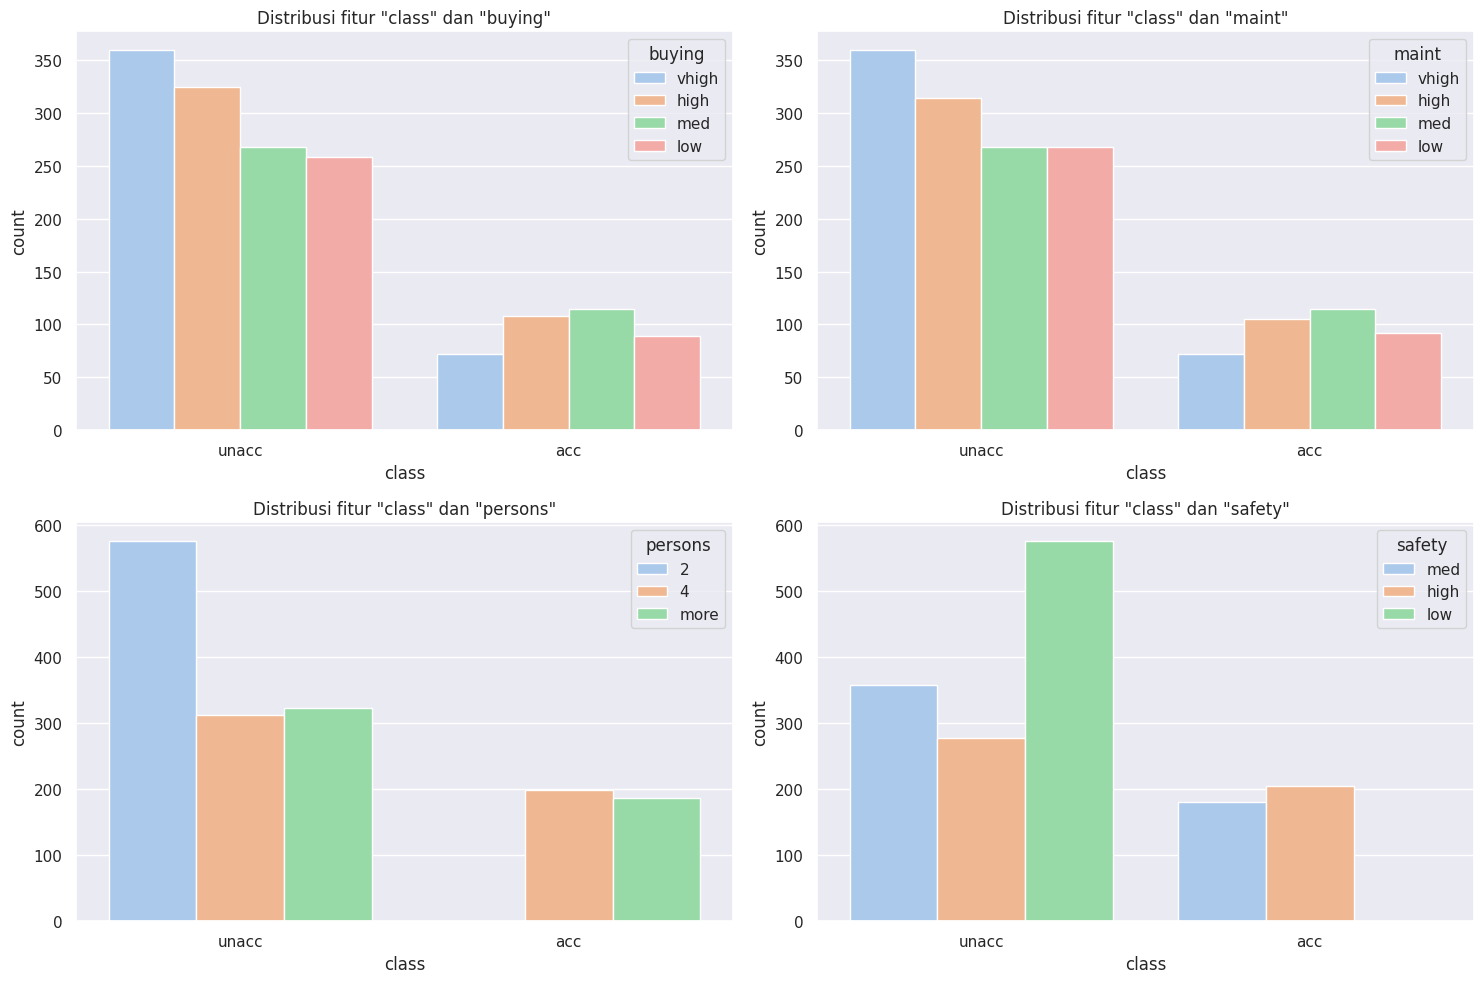

In [12]:
# Data profiling menggunakan visualisasi
sns.set_theme()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[1, 0], x='class', hue='persons', data=df, palette='pastel')
axes[1, 0].set_title('Distribusi fitur "class" dan "persons"')

sns.countplot(ax=axes[0, 1], x='class', hue='maint', data=df, palette='pastel')
axes[0, 1].set_title('Distribusi fitur "class" dan "maint"')

sns.countplot(ax=axes[1, 1], x='class', hue='safety', data=df, palette='pastel')
axes[1, 1].set_title('Distribusi fitur "class" dan "safety"')

sns.countplot(ax=axes[0, 0], x='class', hue='buying', data=df, palette='pastel')
axes[0, 0].set_title('Distribusi fitur "class" dan "buying"')

plt.tight_layout()
plt.show()

* **Distribusi fitur "class" dan "buying**

  Terlihat pada diagram batang berwarna biru, mobil dengan 'buying' tertinggi merupakan faktor yang paling banyak mempengaruhi keputusan 'unacc'

* **Distribusi fitur "class" dan "maint**

  distribusi frekuensi jumlah mobil berdasarkan kelas dan biaya maintenance, kita bisa melihat berapa banyak mobil dengan biaya maintenance yang rendah dan termasuk dalam kategori 'acc'

* **Distribusi fitur "class" dan "persons**

  terlihat pada diagram batang berwarna orange dan hijau, mobil dengan kapasitas 4 orang dan more nilai hampri sejajar sementara diagram batang berwarna biru, mobil dengan kapasitas 2 orang merupakan faktor yang paling banyak mempengaruhi munculnya keputusan 'unacc'

* **Distribusi fitur "class" dan "safety**

  dengan melihat plot tersebut, kita dapat menilai seberapa banyak mobil dari setiap kelas yang memiliki nilai **safety** tertentu.

## 5.4 Transformasi data dengan One-hot Encoding

Transformasi data melibatkan konversi data ke dalam format yang sesuai untuk analisis. Ini mungkin termasuk mengubah variabel kategori menjadi variabel numerik, menormalkan variabel numerik, atau membuat variabel baru berdasarkan variabel yang ada

In [20]:
# Import category_encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [21]:
# Melakukan one-hot encoding menggunakan category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Mengubah semua kolom kategorikal pada data menjadi numerik dengan menggunakan metode One Hot Encoding.

Sederhananya metode ini akan  membuat sejumlah kolom berdasarkan nilai unik pada kolom tersebut. Sebagai contoh kolom 'buying' yang memiliki 4 nilai unik yaitu (vhigh, high, med, dan low) dengan tipe data string/object.

Maka jika menggunakan One Hot Encoding kita akan membuat 4 nilai dalam kolom buying yang tadinya kategorical menjadi numerical.

Pada kasus ini misalnya: Vhigh menjadi 1, high=2, med=3, low=4. begitu juga dengan kolom lainya (maint, doors, persons, lug_boot, safety)

In [22]:
# melihat dataset setelah dilakukan one-hot encoding
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
56,1,1,1,1,1,1
142,1,2,2,1,2,2
742,2,3,3,2,1,2
559,2,2,4,3,3,2
622,2,2,3,1,3,2


In [ ]:
# melihat nilai unique pada fitur 'buying'
nilai_unique = X_train['buying'].unique()
nilai_unique

array([1, 2, 3, 4])

terlihat pada fitur **buying** yang awalnya nilainya adalah (vhigh, high, med, dan low) setelah dilakukan encoding menjadi array numpy dengan nilai (1, 2, 3, 4)

## 5.5 Pembagian Data untuk Pelatihan dan Pengujian
Pembagian data untuk pelatihan dan pengujian adalah langkah penting dalam mempersiapkan data untuk regresi. Biasanya, data dibagi menjadi dua set: satu set untuk
melatih model (data pelatihan) dan satu set untuk menguji kinerja model (data pengujian).


In [17]:
# Memisahkan fitur 'class' sebagai variabel target
X = df.drop('class', axis=1)
y = df['class']

`X = df.drop('class', axis=1)` menghapus fitur 'class' dan menentukan fitur lainnya(selain fitur 'class') sebagai variabel/fitur independent (tidak terpengaruhi)

`y = df['class']` menentukan fitur 'class' sebagai variabel target/dependent (target)




In [18]:
# Menentukan hyperparameter untuk data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((1274, 6), (319, 6))

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)` menentukan hyperparameter untuk data training dan testing. data testing diatur sebanyak 0.2 atau 20% dari total keseluruhan dataset dengan random state=1 memiliki arti jika pemilihan data testing tidak akan berubah setiap kali kita mengatur nilainya dengan 1

In [19]:
# Menampilkan jumlah kemunculan setiap nilai pada target data uji
y_test.value_counts()

unacc    238
acc       81
Name: class, dtype: int64

## 5.6 Melatih Model

### a. Penerapan Decision Trees

In [23]:
# Melatih model Decision Tree pada data latih
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

`clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)`, membuat objek `DecisionTreeClassifier` dan menyimpannya dalam variabel `clf_en`. kriteria yang digunakan untuk memisahkan node adalah `entropy` sedangkan kedalaman maksimum diatur ke 4. random state diatur ke 1 agar hasil dapat diproduksi secara konsisten.

`clf_en.fit(X_train, y_train)`, melatih model decision tree yang telah dilatih sebelumnya pada variabel X_train dan y_train. pada baris code ini, model mempelajari hubungan antara fitur dan label sehingga dapat melakukan klasifikasi pada data uji.

In [24]:
# Memprediksi target dengan data uji
y_pred_en = clf_en.predict(X_test)

`y_pred_en = clf_en.predict(X_test)` melakukan prediksi pada uji X_test dengan menggunakan model decision tree yang telah dilatih sebelumnya `clf_en`. hasil prediksi akan disimpan dalam variabel `y_pred_en`

In [25]:
# Menampilkan akurasi model pada data uji
from sklearn.metrics import accuracy_score  # modol ini akan digunakan untuk menghiung akurasi model
print('Test-set accuracy score: {0:0.3f}'. format(accuracy_score(y_test, y_pred_en)))

Test-set accuracy score: 0.915


`accuracy_score()` akan membandingkan hasil prediksi `y_pred_en` dengan label asli dari data uji `y_test` untuk menghitung akurasi model.

In [26]:
# Menampilkan akurasi model pada data latih
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.900


`y_pred_train_en = clf_en.predict(X_train)`, melakukan prediksi target variabel pada data latih (X_train) menggunakan model decision tree yang sudah dilatih (clf_en) sebelumnya, dah hasilnya disimpan ke variabel `y_pred_train_en `

Nilai akurasi dihitung dengan membandingkan nilai target variabel pada data latih (y_train) dengan hasil prediksi pada data latih (y_pred_train_en) menggunakan fungsi `accuracy_score()` dari library Scikit-learn

[Text(0.25, 0.9, 'x[5] <= 1.5\nentropy = 0.791\nsamples = 1274\nvalue = [303, 971]'),
 Text(0.125, 0.7, 'entropy = 0.0\nsamples = 464\nvalue = [0, 464]'),
 Text(0.375, 0.7, 'x[3] <= 1.5\nentropy = 0.954\nsamples = 810\nvalue = [303, 507]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 304\nvalue = [0, 304]'),
 Text(0.5, 0.5, 'x[0] <= 2.5\nentropy = 0.972\nsamples = 506\nvalue = [303, 203]'),
 Text(0.25, 0.3, 'x[1] <= 1.5\nentropy = 0.99\nsamples = 303\nvalue = [134, 169]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 76\nvalue = [0, 76]'),
 Text(0.375, 0.1, 'entropy = 0.976\nsamples = 227\nvalue = [134, 93]'),
 Text(0.75, 0.3, 'x[4] <= 2.5\nentropy = 0.652\nsamples = 203\nvalue = [169, 34]'),
 Text(0.625, 0.1, 'entropy = 0.362\nsamples = 116\nvalue = [108, 8]'),
 Text(0.875, 0.1, 'entropy = 0.88\nsamples = 87\nvalue = [61, 26]')]

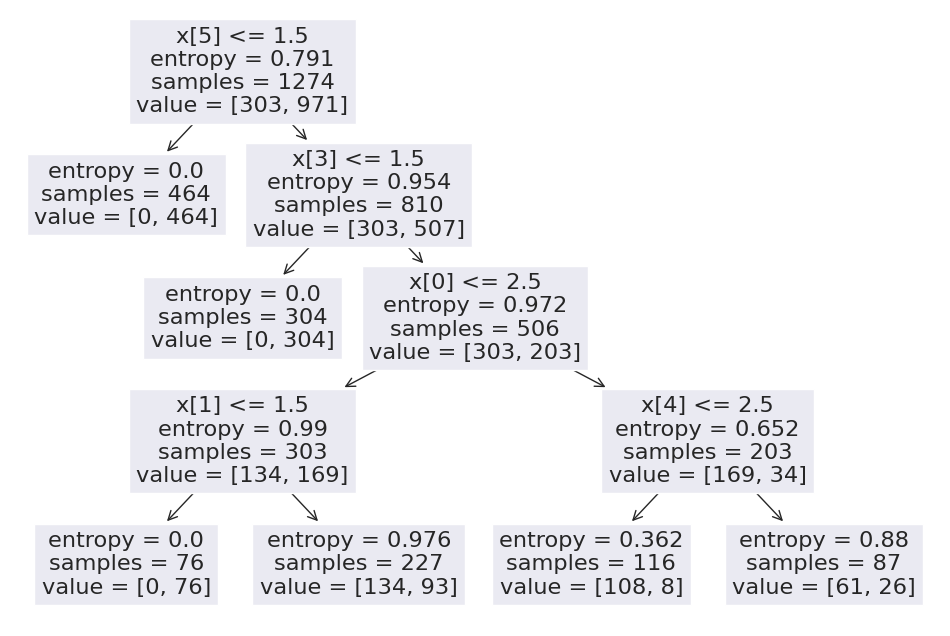

In [27]:
# Membuat plot model Decision Tree
plt.figure(figsize=(12, 8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

Keterangan grafik:

* **X[5] <= 1.5 **: ini adalah aturan pemisah (split rule) yang digunakan oleh model. dalam hal ini, X[5] merupakan varibael yang dipilih sebagai variabel yang paling baik dalam memisahkan data, dan nilai pemisahnya adalah 1.5. X[5] variabel disini adalah fitur safety.

* **Entropy = 0.791**: ini adalah ukuran ketidakpastian pada set data sebelum pemisah dilakukan. Semakin tinggi nilai entropy, semakin banyak ketidakpastian yang terkandung dalam data.

* **Samples = 1274**: ini adalah jumlah total sampel dalam set data yang dipisahkan oleh aturan pemisah tersebut.

* **Value = [303, 971]**: ini adalah jumlah sampel dari masing-masing kelas setelah dilakukan pemisah dengan aturan tersebut. dalam hal ini, kelas 1 memiliki 303 samepl, dan kelas 2 memiliki 971 sampel.

* split kanan dihasilkan dari pengujian apakah nilai fitur (X[3]) lebih kecil atau sama dengan 1.5. jika nilainya ya, maka data akan masuk ke node ini. pada node ini terdapat 810 data yang termasuk ke dalamnya, dengan entropy sebesar 0.954. dari data tersebut, terdapat 303 data yang termasuk ke dalam kelas pertama dan 507 data yang termasuk ke dalam kelas kedua. X[3] variabel disini adalah fitur persons.

* split kiri dihasilkan dari pengujian apakah fitur (X[3]) <= 1.5. jika nilainya ya, maka data akan masuk ke node ini. pada node ini, terdapat 467 sampel yang termasuk ke dalamnya, dengan entropy sebesar 0.0. hal ini menunjukan bahwa pada node ini, semua data sudah termasuk ke dalam kelas yang sama, yaitu kelas kedua. sehingga tidak perlu ada split lanjutan.

* Penjelasan yang sama juha berlaku untuk node decision dan node leaf lainnya.

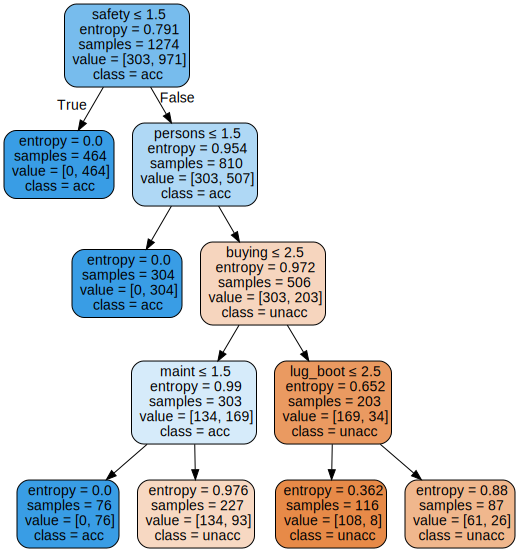

In [28]:
# Visualisasi Decision Tree yang lebih rapi
from sklearn.tree import export_graphviz
import graphviz
# Membuat dot data
dot_data = tree.export_graphviz(clf_en, out_file=None,
                           feature_names=X_train.columns,
                           class_names=y_train.unique(),
                           filled=True, rounded=True,
                           special_characters=True)

# Membuat graph dari dot data
graph = graphviz.Source(dot_data)

# Tampilkan graph
graph

In [ ]:
# Evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion Matrics\n\n', cm)

Confusion Matrics

 [[ 81   0]
 [ 27 211]]


* Nilai 81 di posisi [0,0] menunjukan jumlah True Positive (benar positif) yang dihasilkan oleh model yaitu sebanyak 81. artinya model memprediksi 81 data sebagai kelas positif (misalnya, 'acc') dan kelas tersebut benar-benar masuk ke dalam kelas positif menurut nilai sebenarnya. berdasarkan output yang dihasilkan pada proses sebelumnya, class 'acc' pada data testing memiliki nilai sebanyak 81 data.

* Nilai 0 di posisi [0,1] menunjukan jumlah False Negative (salah negatif) yang dihasilkan oleh model, yaitu sebanyak 0. Artinya model memprediksi 0 data sebagai kelas negatif padahal seharusnya kelas tersebut adalah kelas negatif menurut nilai sebenarnya (Type 1 error).

* Nilai 27 di posisi [1,1] menunjukan jumah False Positive (salah positif) yang dihasilkan oleh model, yaitu sebanyak 27. Artinya model memprediksi 27 data sebagai kelas positif padahal seharusnya kelas tesebut adalah kelas negatif menurut nilai sebenarnya (Type 2 error).

* Nilai 211 di posisi [1,1] menunjukan julah True Negative (benar negatif) yang dihasilkan oleh model, yaitu sebesar 211. Artinya model memprediksi 211 data sebagai kelas negatif dan kelas tersebut benar-benar termasuk pada kelas negatif menurut nilai sebenarnya. Berdasarkan output yang dihasilkan pada proses sebelumnya, class 'unacc' pada data testing memiliki jumlah sebanyak 238 data.

In [29]:
# Membuat laporan klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.75      1.00      0.86        81
       unacc       1.00      0.89      0.94       238

    accuracy                           0.92       319
   macro avg       0.88      0.94      0.90       319
weighted avg       0.94      0.92      0.92       319



Keterangan hasil:

* **Precision**: mengukur proporsi hasil positif yang benar dari keseluruhan hasil yang dinyatakan sebagai positif oleh model. dalam hal ini precision untuk label 'acc' adalah 0.75 sedangkan untuk label 'unacc' adalah 1.00. ini berarti, ketika model memprediksi label 'acc' sebanyak 75% prediksi tersebut benar, sedangkan ketika model memprediksi label 'unacc' sebanyak 100% prediksi tersebut benar.

* **Recall**: mengukur proporsi hasil positif yang benar dari keseluruhan data aktual yang positif. dalam hal ini recall label 'acc' adalah 1.00, sedangkan untuk label 'unacc' adalah 0.89. ini berarti, ketika model memprediksi label acc sebanyak 89% data aktual dengan label 'acc' berhasil ditemukan oleh model. sedangkan ketika model memprediksi label 'unacc' sebanyak 100% data aktual dengan label 'unacc' berhasil ditemukan oleh model.

* **F1-score**: mengukur rata-rata harmonik dari precision dan recall. dalam hal ini, f1-score untuk label 'acc' adalah 0.86 dan untuk label 'unacc' adalah 0.94. semakin tinggi nilai f1-score semakin baik performa model.

* **Support**: jumlah data aktual untuk setiap label pada data uji.

* **Accuracy**: mengukur proporsi hasil prediksi yang benar dari keseluruhan data uji. dalam hal ini, akurasi model adalah 0.92 yang beerarti sebanyak 92% dari data uji berhasil diprediksi dengan benar oleh model.

* **Macro average**: rata-rata dari precision, recall, dan f1-score untuk setiap label pada data uji.

* **Weighted average**: rata-rata dari precision, recall, dan f1-score untuk setiap label pada data uji, yang dihitung dengan mempertimbangkan proporsi jumlah data untuk setiap label.

### b. Penerapan Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score for model evaluation

# Inisialisasi model Random Forest dengan 100 decision trees
model = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=0)

# Melatih model menggunakan data training (X_train dan y_train)
model.fit(X_train, y_train)

# Memprediksi label kelas untuk data uji (X_test)
y_pred = model.predict(X_test)

# Menghitung akurasi model dengan menggunakan accuracy_score
print('Model accuracy_score with 100 decision_trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy_score with 100 decision_trees: 0.9812


In [31]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix untuk menghitung matriks kebingungan

# Menghitung matriks kebingungan dengan membandingkan label kelas sebenarnya (y_test) dengan label kelas yang diprediksi (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Mencetak matriks kebingungan
print('confusion matrix\n\n', cm)

confusion matrix

 [[ 79   2]
 [  4 234]]


<Axes: >

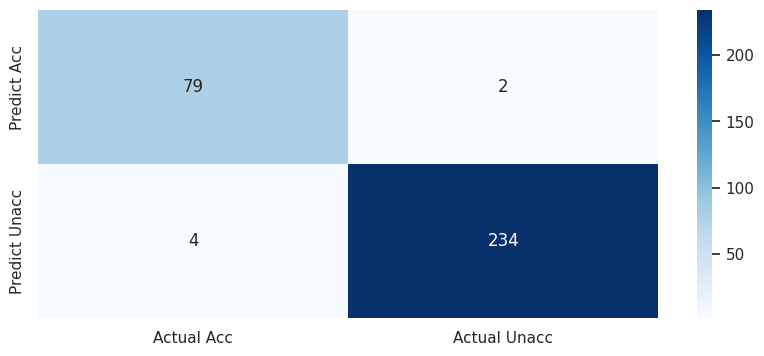

In [36]:
plt.figure(figsize=(10, 4))  # Mengatur ukuran gambar untuk heatmap

# Membuat DataFrame dari matriks kebingungan dengan label kolom dan baris yang sesuai
cm_matrix = pd.DataFrame(cm, columns=['Actual Acc', 'Actual Unacc'],
                         index=['Predict Acc', 'Predict Unacc'])

# Membuat heatmap dari matriks kebingungan dengan menggunakan seaborn
# Annot=True untuk menampilkan angka di dalam sel, fmt='d' untuk format integer, cmap='Blues' untuk skema warna
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')


In [37]:
from sklearn.metrics import classification_report  # Import classification_report untuk menampilkan laporan klasifikasi

# Mencetak laporan klasifikasi yang komprehensif menggunakan classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.95      0.98      0.96        81
       unacc       0.99      0.98      0.99       238

    accuracy                           0.98       319
   macro avg       0.97      0.98      0.98       319
weighted avg       0.98      0.98      0.98       319



* Precision: Menunjukkan seberapa banyak prediksi yang benar dari kelas tertentu. Misalnya, dari semua prediksi yang dilabeli sebagai "acc" dan 'unacc', seberapa banyak yang sebenarnya benar "acc" dan 'unacc'.

* Recall: Menunjukkan seberapa banyak dari semua contoh aktual kelas tertentu yang berhasil diprediksi dengan benar oleh model. Misalnya, dari semua contoh "acc" dan 'unacc' yang sebenarnya ada, berapa banyak yang berhasil diprediksi dengan benar sebagai "acc" dan 'unacc'.

* F1-score: Merupakan rata-rata harmonik dari presisi dan recall. Ini memberikan ukuran gabungan tentang seberapa baik model dapat memprediksi kelas tertentu.

* Support: Merupakan jumlah contoh aktual untuk setiap kelas dalam data tes.

* Accuracy: Merupakan akurasi umum dari model, yaitu berapa banyak prediksi yang benar secara keseluruhan.

# 6 Penjelasan Parameter untuk Hyperparameter Tuning

## 6.1 Decision Trees

  * **criterion:** Fungsi untuk mengukur kualitas pemisahan simpul ('gini' atau 'entropy')
  * **max_depth:** Kedalaman maksimum pohon
  * **min_samples_split:** Jumlah minimum sampel yang diperlukan untuk memecah simpul internal
  * **min_samples_leaf:** Jumlah minimum sampel yangdiperlukan di simpul daun
  * **max_features:** Jumlah ﬁtur yang akan dipertimbangkan saat mencari pemisahan terbaik
  * **max_leaf_nodes:** Batas maksimum simpul daun
  * **min_impurity_decrease:** Batas penurunan impurity minimum yang harus dicapai untuk memecah simpul

## 6.2 Random Forest

  * **n_estimators**: Jumlah Decision Trees dalam Random Forest
  * **criterion**: Fungsi untuk mengukur kualitas pemisahan simpul ('gini' atau 'entropy')
  * **max_depth**: Kedalaman maksimum pohon
  * **min_samples_split**: Jumlah minimum sampel yang diperlukan untuk memecah simpul internal
  * **min_samples_leaf**: Jumlah minimum sampel yang diperlukan di simpul daun
  * **max_features**: Jumlah ﬁtur yang akan dipertimbangkan saat mencari pemisahan terbaik
  * **max_leaf_nodes**: Batas maksimum simpul daun
  * **min_impurity_decrease**: Batas penurunan impurity minimum yang harus dicapai untuk memecah simpul
  * **bootstrap**: Metode untuk mengambil sampel data latih (True untuk bagging, False untuk pemilihan tanpa penggantian)
  * **oob_score**: Menggunakan out-of-bag samples untuk mengestimasi akurasi model
  * **n_jobs**: Jumlah pekerjaan paralel yang diizinkan untuk komputasi
  * **random_state**: Seed untuk pengulangan yang bisa direproduksi
  * **verbose**: Mengontrol keluaran pesan verbositas
  * **warm_start**: Menggunakan hasil sebelumnya sebagai inisialisasi untuk model baru

# 7 Hal-Hal yang Harus Diperhatikan

## 7.1 Decision Trees

Pengendalian overﬁtting dengan membatasi kedalaman pohon atau melakukan pruning Penting untuk menyeimbangkan pohon agar kinerja lebih optimal Mengatasi ﬁtur kategorikal yang memiliki banyak kategori dengan menggabungkan atau mengurangi jumlah kategori

## 7.2 Random Forest

Menyertakan jumlah pohon yang cukup dalam hutan untuk mengurangi varians dan
meningkatkan kinerja
Menyetel parameter secara optimal untuk menghindari overﬁtting atau underﬁtting
Menyadari waktu pelatihan yang lebih lama dan kebutuhan memori yang lebih tinggi
dibandingkan dengan metode lain

# 8 Kelebihan dan Kekurangan

## 8.1 Decision Trees

**Kelebihan**:
  * Mudah diinterpretasi dan dijelaskan
  * Tidak memerlukan normalisasi data
  * Bisa menangani ﬁtur kategorikal dan numerik
  * Pemrosesan awal yang minimal

**Kekurangan**:
  * Rentan terhadap overﬁtting
  * Tidak cocok untuk klasiﬁkasi linier
  * Sensitif terhadap rotasi data
  * Mungkin tidak menghasilkan pohon yang optimal secara global


## 8.2 Random Forest

**Kelebihan:**
  * Mengurangi overﬁtting
  * Bisa menangani ﬁtur kategorikal dan numerik
  * Memberikan pentingnya ﬁtur
  * Tidak memerlukan normalisasi data

**Kekurangan:**
  * Memerlukan lebih banyak waktu pelatihan
  * Memerlukan lebih banyak memori
  * Sulit diinterpretasi dibandingkan dengan Decision Trees tunggal